<a href="https://colab.research.google.com/github/omarmoh26/BE-Alert/blob/main/EEG_Dataset_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas_profiling as pp

data = pd.read_csv('/content/gdrive/My Drive/EEG_data.csv')

In [ ]:
data.head()


,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


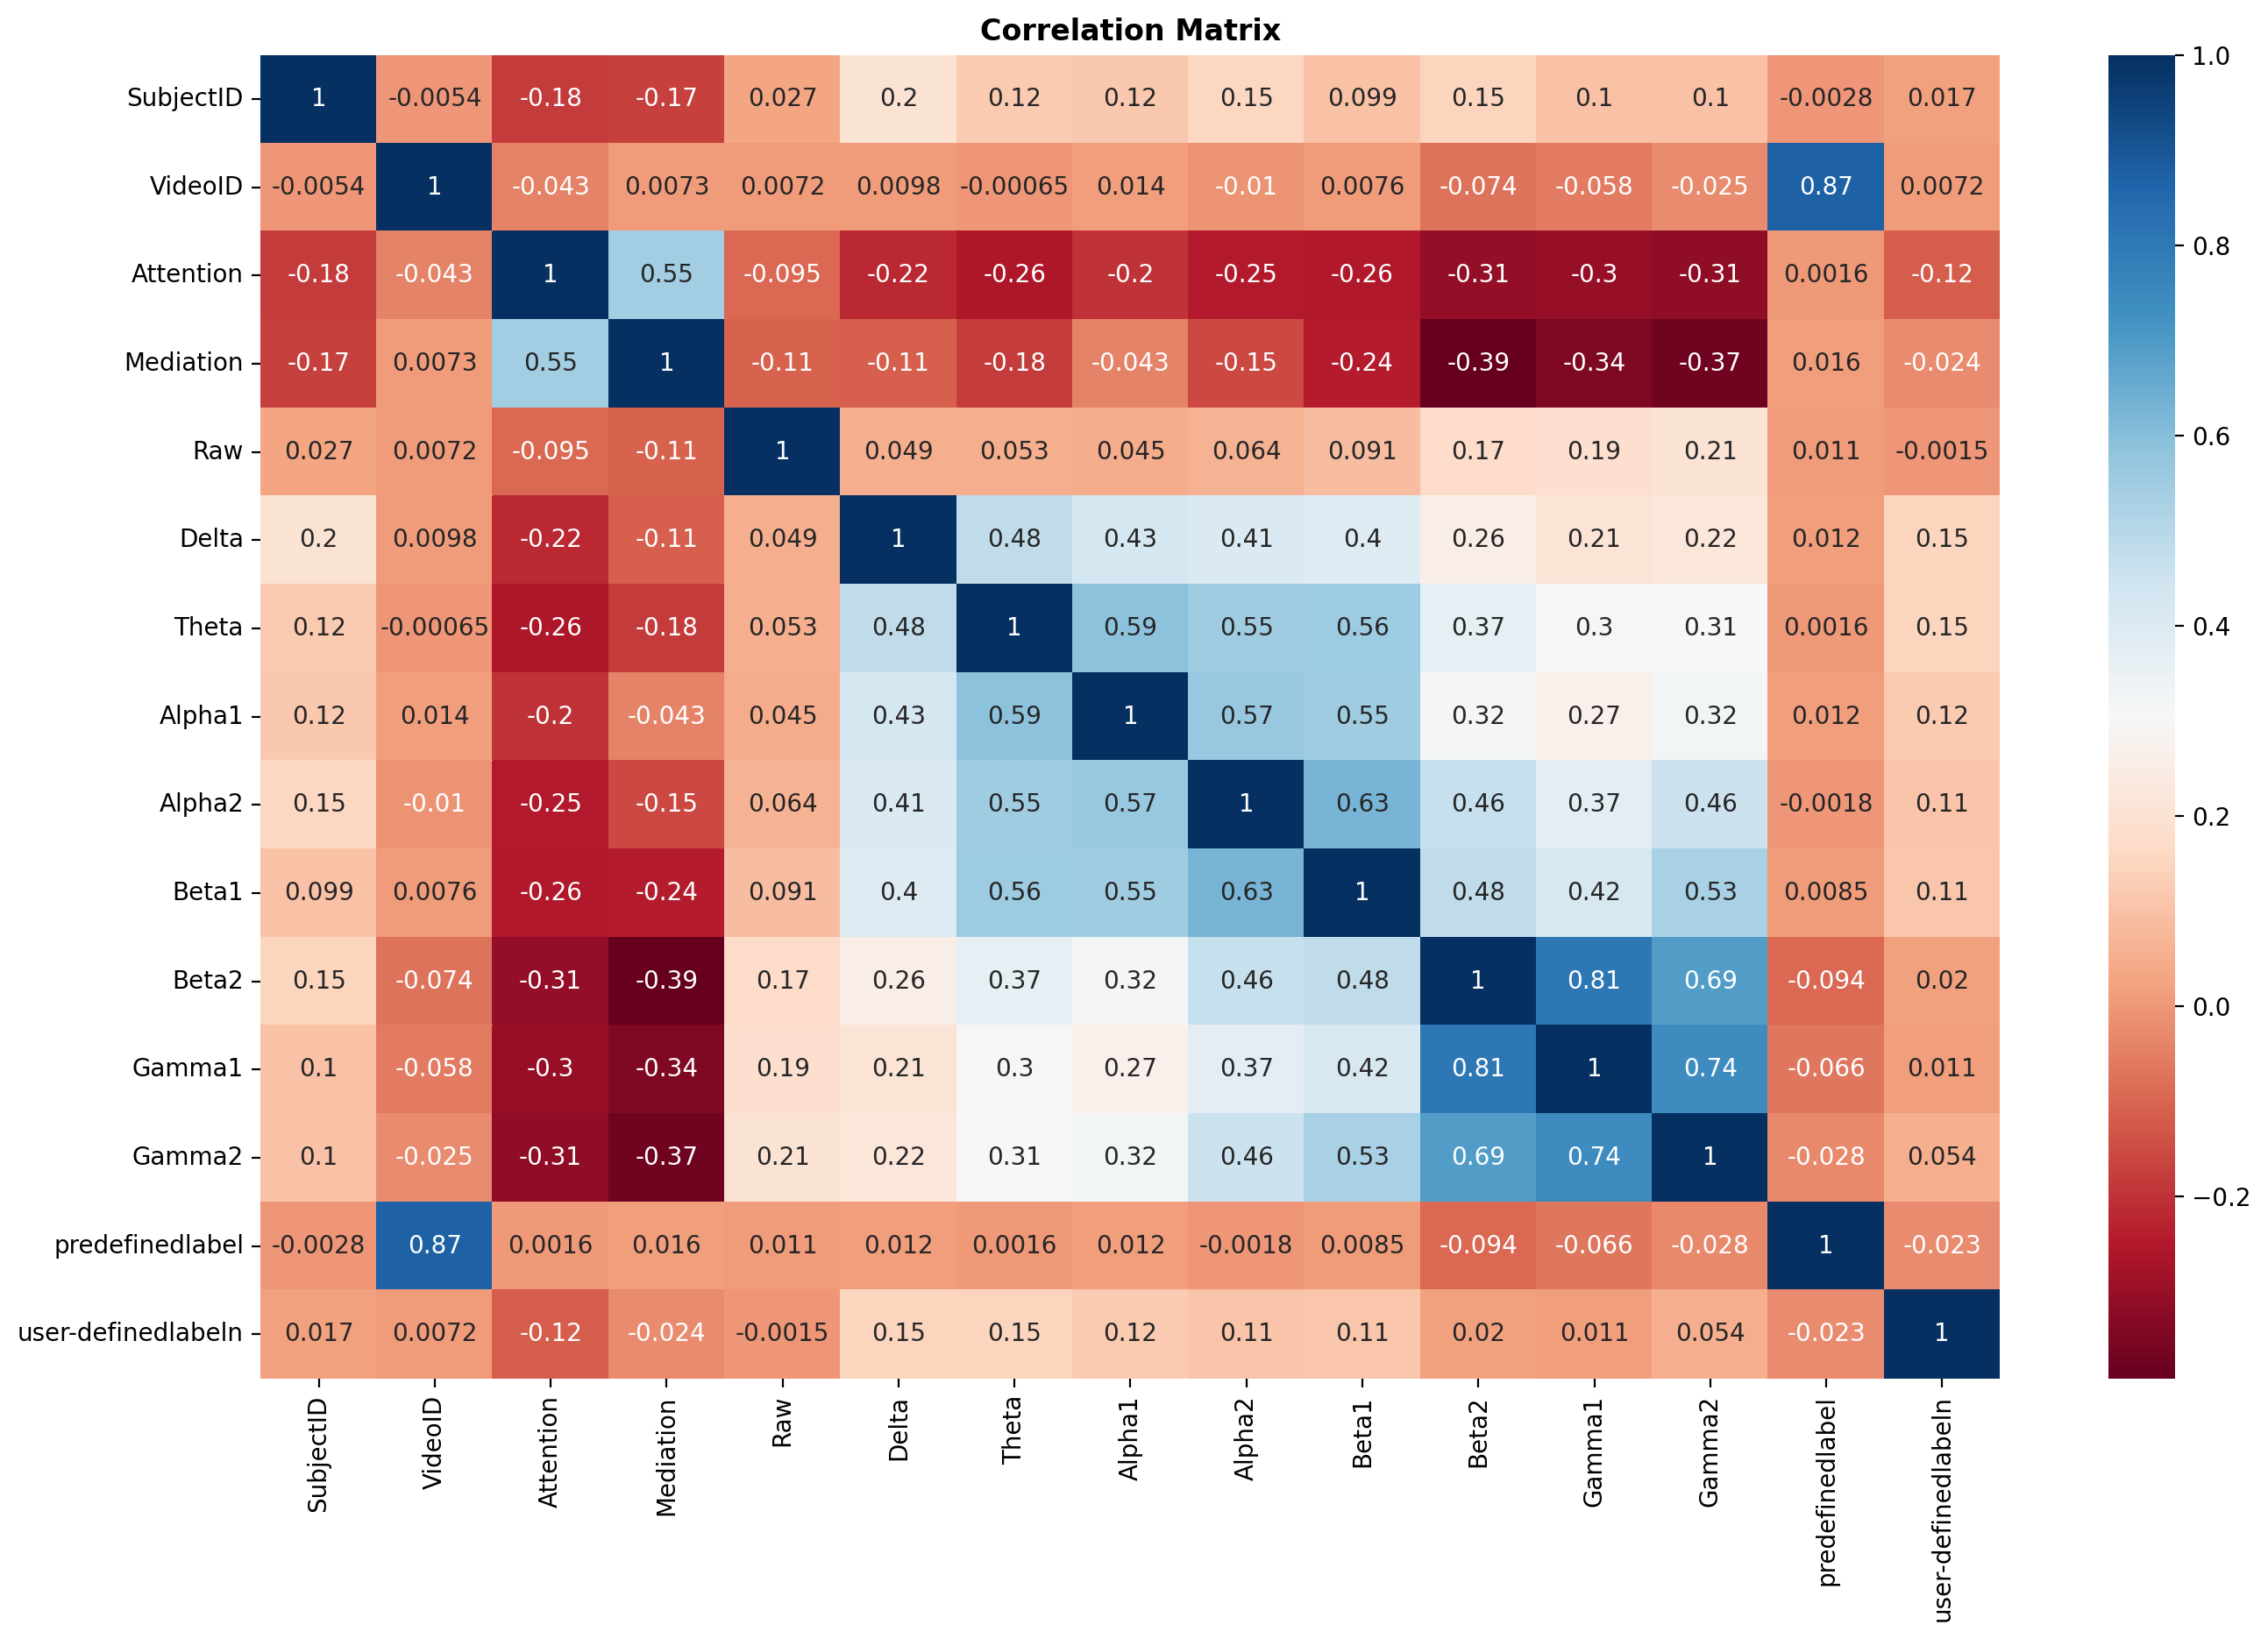

In [ ]:
plt.figure(figsize = (16,10), dpi=200)
ax = plt.axes()
sns.heatmap(data.corr(), annot = True, cmap='RdBu', ax=ax)
ax.set_title('Correlation Matrix', weight='bold')
plt.show()

In [ ]:
data.head()
data[['SubjectID','Attention','Mediation','Theta','Alpha1','Alpha2']].describe()

,SubjectID,Attention,Mediation,Theta,Alpha1,Alpha2
count,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04
mean,4.487394,41.313871,47.182656,1.680526e+05,4.138435e+04,3.318339e+04
std,2.865373,23.152953,22.655976,2.441346e+05,7.243082e+04,5.831410e+04
min,0.000000,0.000000,0.000000,1.700000e+01,2.000000e+00,2.000000e+00
25%,2.000000,27.000000,37.000000,2.691750e+04,6.838000e+03,6.852000e+03
50%,4.000000,43.000000,51.000000,8.133100e+04,1.750000e+04,1.495900e+04
75%,7.000000,57.000000,63.000000,2.052760e+05,4.477950e+04,3.455050e+04
max,9.000000,100.000000,100.000000,3.007802e+06,1.369955e+06,1.016913e+06


In [ ]:
data1=data[['Attention','Theta','Alpha1','Alpha2']]

In [ ]:
data1.head()

,Attention,Theta,Alpha1,Alpha2
0,56.0,90612.0,33735.0,23991.0
1,40.0,28083.0,1439.0,2240.0
2,47.0,383745.0,201999.0,62107.0
3,47.0,129350.0,61236.0,17084.0
4,44.0,354328.0,37102.0,88881.0


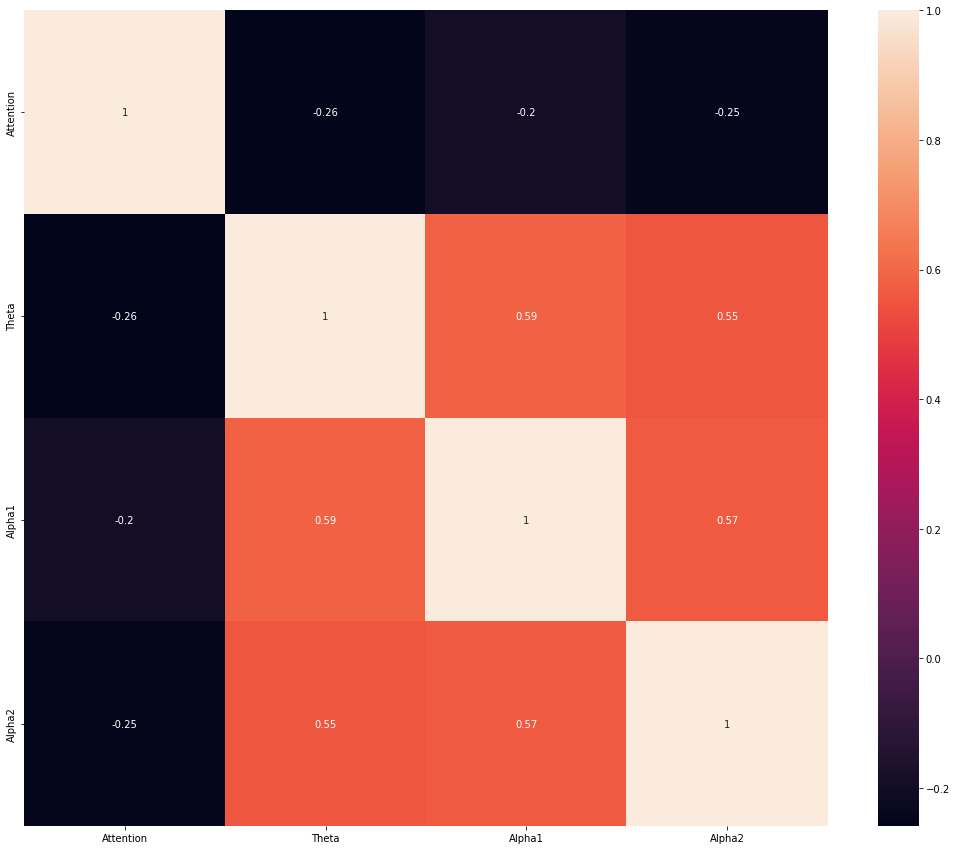

In [ ]:
corr = data1.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 22.0 MB 160 kB/s
     |████████████████████████████████| 102 kB 36.4 MB/s 
     |████████████████████████████████| 690 kB 56.0 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 9.8 MB 49.2 MB/s 
     |████████████████████████████████| 4.7 MB 54.5 MB/s 
     |████████████████████████████████| 296 kB 70.1 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.4.0-py2.py3-none-any.whl size=315269 sha256=8126c98672422f04e084604ac62ebd6b618498e7e4fa0db0d97eeb2f24ae9f3f
  Stored in directory: /tmp/pip-ephem-wheel-cache-cbj1zh40/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a81d410498517faf8e29c7a3c22c2bdbbaead3de1b3c994d23710c93bf2cc707
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba86876882394

In [ ]:
# One-hot encoding Ethnicity and Gender
# df = pd.get_dummies(data1)

pp.ProfileReport(data1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
result = []
for value in data1['Attention']:
    if value >= 50:
        result.append('1')
    else:
        result.append('0')

data1["Result"] = result  
print(data1)

       Attention      Theta    Alpha1    Alpha2 Result
0           56.0    90612.0   33735.0   23991.0      1
1           40.0    28083.0    1439.0    2240.0      0
2           47.0   383745.0  201999.0   62107.0      0
3           47.0   129350.0   61236.0   17084.0      0
4           44.0   354328.0   37102.0   88881.0      0
...          ...        ...       ...       ...    ...
12806       64.0     9951.0     709.0   21732.0      1
12807       61.0   797464.0  153171.0  145805.0      1
12808       60.0   154296.0   40068.0   39122.0      1
12809       60.0    27346.0   11444.0    9932.0      1
12810       64.0  1184366.0   50014.0  124208.0      1

[12811 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
data1['Result'].value_counts()

0    7740
1    5071
Name: Result, dtype: int64

In [ ]:
y=data1.pop('Result')
data1=data1.drop(columns=['Attention'])
data1.head()

,Theta,Alpha1,Alpha2
0,90612.0,33735.0,23991.0
1,28083.0,1439.0,2240.0
2,383745.0,201999.0,62107.0
3,129350.0,61236.0,17084.0
4,354328.0,37102.0,88881.0


In [ ]:
scaler = StandardScaler()
X=scaler.fit_transform(data1)
print(X)

[[-0.31721696 -0.10561319 -0.15764201]
 [-0.57335209 -0.55151816 -0.53065383]
 [ 0.88353246  2.21757712  0.49601615]
 ...
 [-0.05635064 -0.01817461  0.10184224]
 [-0.57637104 -0.41338095 -0.39874234]
 [ 4.16308541  0.11914799  1.5609974 ]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

# from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)



In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
logregAccuracy = logreg_cv.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(logregAccuracy) )

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
Accuracy for our training dataset with tuning is : 65.28%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [ ]:
knn = KNeighborsClassifier()
# from sklearn.model_selection import GridSearchCV
k_range = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 29}


In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 66.10%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
print(CV_rfc.best_params_)
accuracy = CV_rfc.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
Accuracy for our training dataset with tuning is : 67.16%


In [ ]:
from sklearn.svm import SVC


In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.674 total time=   2.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.662 total time=   2.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.666 total time=   2.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.647 total time=   2.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   2.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.605 total time=   2.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.605 total time=   2.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.606 total time=   2.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.606 total time=   2.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.606 total time=   2.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.605 total time=   2.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
accuracy = grid.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 66.73%


In [ ]:
param_grid_full = [
  {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
  {'kernel': ['sigmoid'], 'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
 ]

grid_full = GridSearchCV(SVC(), param_grid_full, cv = 10, scoring='accuracy') 
grid_full.fit(x_train, y_train) 

KeyboardInterrupt: ignored

In [ ]:
print(grid_full.best_params_)


In [ ]:
grid_predictions = grid_full.predict(x_test) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))